<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

## Описание домашнего задания

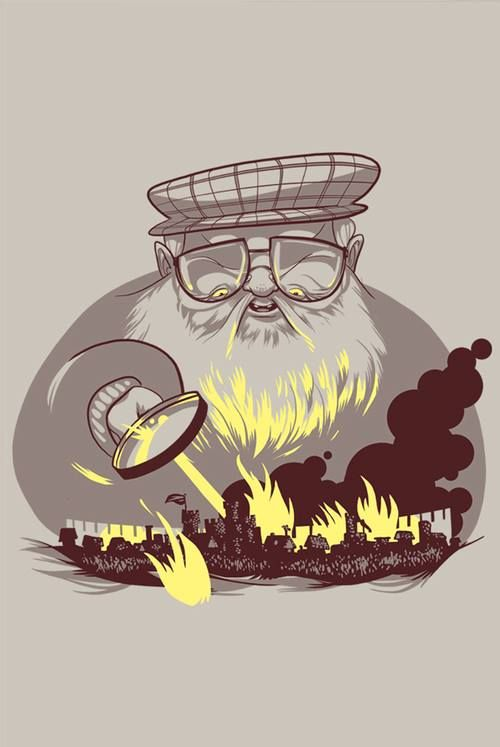

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 15.8MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [10]:
df['isAliveOn305'] = ((df['dateOfBirth'] + df['age']) == 305).astype(int)
median_age = np.quantile(df['age'].dropna().values,q=0.5)
df.loc[df['age'].isna(), 'age'] = median_age #заполняем 'age' медианой
df.loc[df['dateOfBirth'].isna(), 'dateOfBirth'] = 305 - median_age
drop_columns_arr = ['mother', 'father', 'heir',
                     'isAliveMother', 'isAliveFather', 'isAliveHeir', 'name']
df.drop(drop_columns_arr,axis=1, inplace=True)
columns_arr = ['culture', 'title', 'house', 'spouse']
for column in columns_arr:
  df.loc[df[column].isna(), column] = 'no_data'
df.loc[df['isAliveSpouse'].isna(), 'isAliveSpouse'] = 0

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [11]:
treshhold_popularity = np.quantile(df['popularity'].dropna().values,q=0.9) #возьмём такой трешхолд
df['isPopular'] = df['popularity'].apply(lambda x:1 if x>treshhold_popularity else 0)
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for new_val, old_val in cult.items():
  for j in old_val:
    df.loc[df['culture'] == j, 'culture'] = new_val
# df.loc[~df['culture'].isin(cult.keys()), 'culture'] = 'otherCulture'
df['culture'].value_counts()

culture
no_data                    1069
Northmen                    103
Ironborn                     91
Free Folk                    46
Braavosi                     39
Valyrian                     28
Ghiscari                     17
Dornish                      17
Dothraki                     17
Reach                        13
Vale mountain clans          12
Rivermen                     10
Valemen                      10
Westerman                     8
Free folk                     7
Tyroshi                       6
Qartheen                      5
Westermen                     5
Summer Isles                  4
Stormlands                    4
Astapori                      4
Northern mountain clans       3
Dornishmen                    3
Westeros                      3
Ironmen                       3
First Men                     2
Meereenese                    2
Crannogmen                    2
Lysene                        2
Myrish                        2
Sistermen                     2


In [13]:
df['title'].unique()

array(['no_data', 'Lord of the Crossing', 'Ser', 'Queen', 'Greenstone',
       'Hand of the King', 'Archmaester', 'Maester', 'Khal', 'red hand',
       'Castellan', 'Seven Kingdoms', 'PrincessQueen',
       'Lord of the Iron Islands', 'Lord', 'Brother', 'Lord of Coldmoat',
       'Prince of Dragonstone', 'Lady', 'PrincessSepta', 'Princess',
       'Septa', 'Grand Maester', 'Septon', 'King', 'Seneschal',
       'Bloodrider', 'Stokeworth', 'Prince', 'LadyQueenDowager Queen',
       'Lord of the Tides', 'Lord of Dragonstone', 'Goodman', 'Wisdom',
       'King in the North', 'Winterfell', 'Steward', 'Eyrie',
       'Casterly Rock', 'Cupbearer', 'Hornwood',
       'Lord Steward of the Iron Islands', 'Blue Grace', 'Red Priest',
       'Khalakka', 'Good Master', 'QueenBlack Bride', 'Last Hearth',
       'Lord Paramount of the Mander', 'Seagard', 'Goodwife', 'Uplands',
       'BrotherProctor', 'Coldmoat', 'Ashford', 'Wind Witch', 'LadyQueen',
       'Broad Arch', 'Brightwater', 'Lady Marya', '

Видим что много тайтлов начинается с Lord, King, Master. Упростим их

In [14]:
df['Title'] = df.title.str.extract(r'^(Lord|King|Master)', expand=False)
df.loc[~df['Title'].isna(), 'title'] = df['Title']


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [15]:
df.drop(columns=['spouse','Title'], inplace = True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

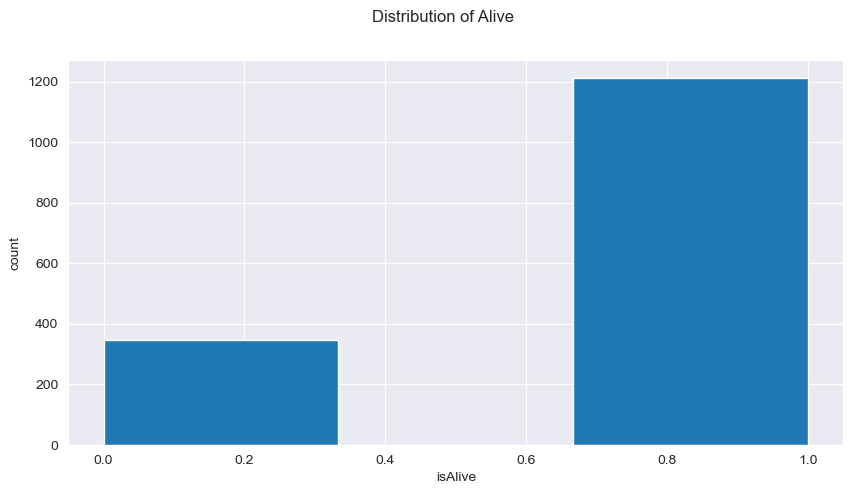

In [16]:
plt.figure(figsize = (10,5))
plt.hist(df['isAlive'], density=False, bins=3)
plt.xlabel('isAlive')
plt.ylabel('count')
plt.suptitle('Distribution of Alive')
plt.show()

Переменная категориальная, классы несбалансированы

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [17]:

cat_features = ['title', 'culture','house']
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_features),\
                          index=df.index
                          )

df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df.drop(cat_features, axis=1, inplace=True)

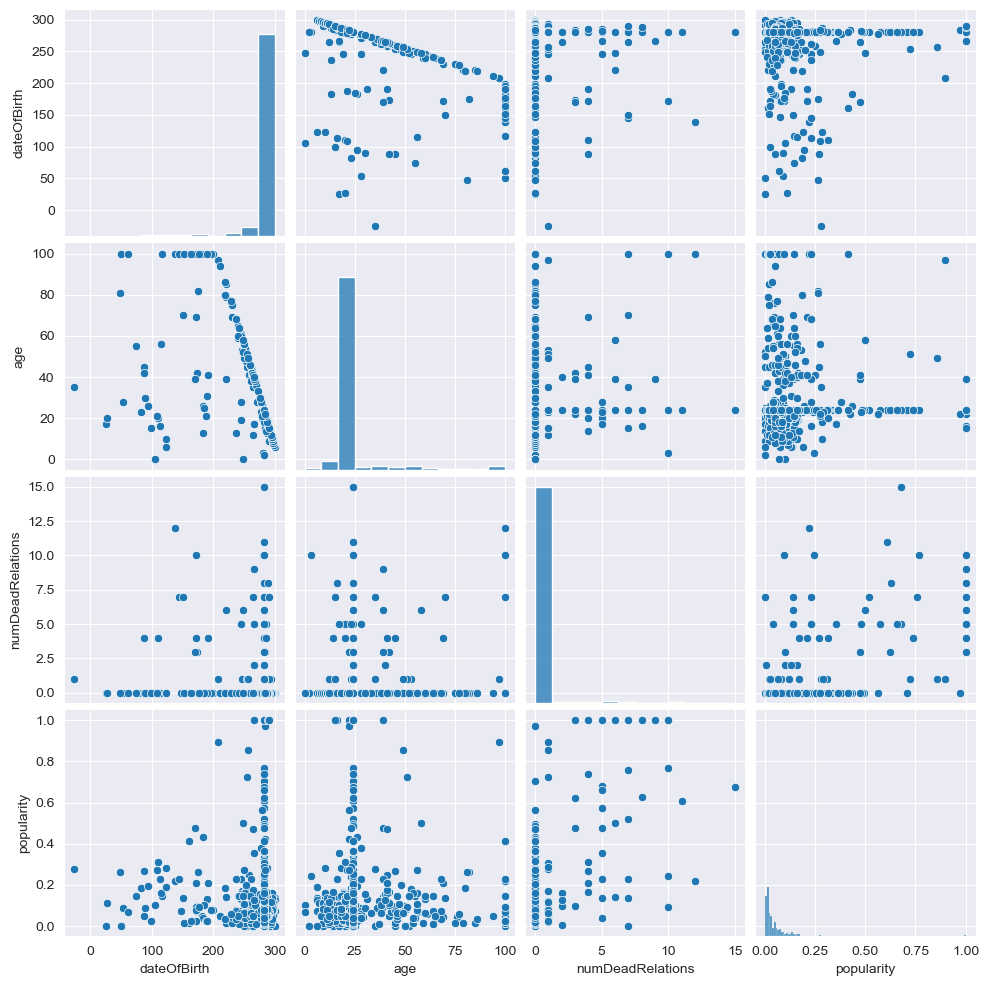

In [18]:
num_features = ['dateOfBirth', 'age', 'numDeadRelations', 'popularity']
sns.pairplot(df[num_features])

Есть корреляция между age и dateOfBirth, что неудивительно, забьём на неё

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [19]:
corrmat = df.corr()
corrmat['isAlive'].sort_values()

numDeadRelations        -0.198876
isPopular               -0.196181
culture_Valyrian        -0.195454
popularity              -0.194187
house_House Targaryen   -0.187057
                           ...   
culture_Braavosi         0.075621
isAliveOn305             0.198311
book4                    0.284014
dateOfBirth              0.330533
isAlive                  1.000000
Name: isAlive, Length: 536, dtype: float64

Проверим зависимость целевой переменной от dateOfBirth и popularity

/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/4054452828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['bins'] = pd.qcut(temp['dateOfBirth'], q, labels=labels )
/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/4054452828.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2 = temp[['bins', 'isAlive']].groupby(['bins'], as_index=False).mean()


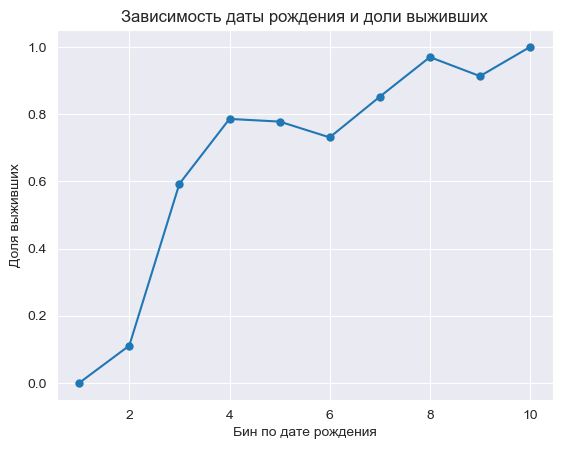

In [20]:
temp = df[df['dateOfBirth'] != 281.0]
q = arr = np.linspace(0, 1, 11)
labels = np.arange(1,11,1)
temp['bins'] = pd.qcut(temp['dateOfBirth'], q, labels=labels )
# plt.hist(temp['bins'])
temp2 = temp[['bins', 'isAlive']].groupby(['bins'], as_index=False).mean()
plt.plot(temp2['bins'], temp2['isAlive'], marker='o', markersize=5)
plt.xlabel('Бин по дате рождения')
plt.ylabel('Доля выживших')
plt.title('Зависимость даты рождения и доли выживших')
plt.show()

/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/948011704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['bins'] = pd.qcut(temp['age'], q, labels=labels )
/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/948011704.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2 = temp[['bins', 'isAlive']].groupby(['bins'], as_index=False).mean()


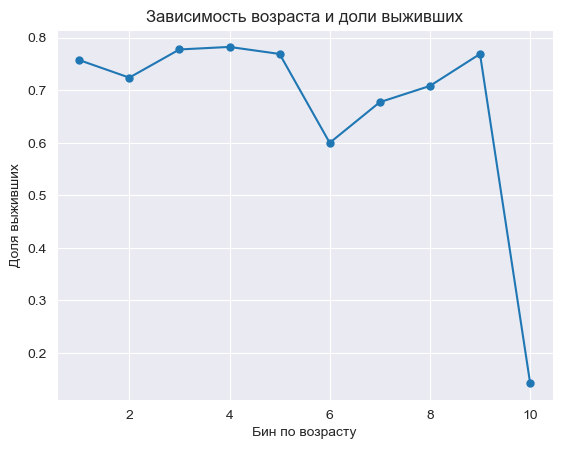

In [21]:
temp = df[df['age'] != 24.0]
q = arr = np.linspace(0, 1, 11)
labels = np.arange(1,11,1)
temp['bins'] = pd.qcut(temp['age'], q, labels=labels )
# plt.hist(temp['bins'])
temp2 = temp[['bins', 'isAlive']].groupby(['bins'], as_index=False).mean()
plt.plot(temp2['bins'], temp2['isAlive'],  marker='o', markersize=5)
plt.xlabel('Бин по возрасту')
plt.ylabel('Доля выживших')
plt.title('Зависимость возраста и доли выживших')
plt.show()

/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/3910469135.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp2 = temp[['bins', 'isAlive']].groupby(['bins'], as_index=False).mean()


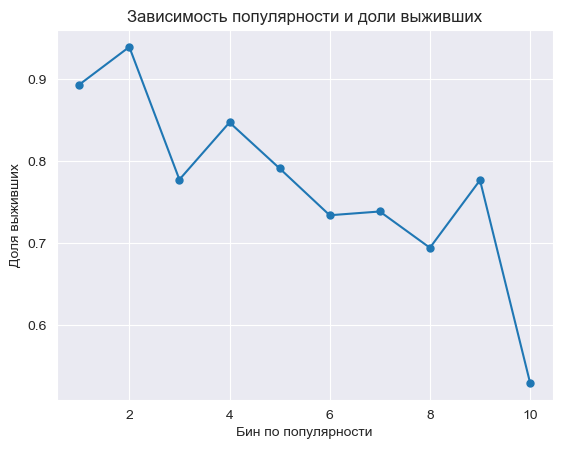

In [22]:
temp = df
q = arr = np.linspace(0, 1, 11)
labels = np.arange(1,11,1)
temp['bins'] = pd.qcut(temp['popularity'], q, labels=labels )
# plt.hist(temp['bins'])
temp2 = temp[['bins', 'isAlive']].groupby(['bins'], as_index=False).mean()
plt.plot(temp2['bins'], temp2['isAlive'],  marker='o', markersize=5)
plt.xlabel('Бин по популярности')
plt.ylabel('Доля выживших')
plt.title('Зависимость популярности и доли выживших')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [23]:
X = df.drop('isAlive', axis=1)
y = df['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=False)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [26]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [27]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [28]:
# Шаг 1. создание модели
model = LogisticRegression(C=0.1, max_iter=100000)

# Шаг 2. обучение модели
model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [29]:
#оценим accuracy кросс валидацией
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Выполняем кросс-валидацию
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Выводим результаты
print("Accuracy на каждом фолде:", scores)
print("Средняя accuracy:", scores.mean())

Accuracy на каждом фолде: [0.83974359 0.85897436 0.86173633 0.85209003 0.8488746 ]
Средняя accuracy: 0.8522837826696348


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [30]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

gp_model = GaussianProcessClassifier(random_state=42)
gp_model.fit(X_train, y_train)
y_pred_gp = gp_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

svc_model = SVC(C=1.0, kernel='rbf', random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

/Users/mr_1necs/miniconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [31]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [32]:
# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8301


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [33]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy : %.4f" % accuracy)

accuracy = accuracy_score(y_test, y_pred_ada)
print("Accuracy : %.4f" % accuracy)
accuracy = accuracy_score(y_test, y_pred_gp)
print("Accuracy : %.4f" % accuracy)
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy : %.4f" % accuracy)
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy : %.4f" % accuracy)
accuracy = accuracy_score(y_test,y_pred_svc)
print("Accuracy : %.4f" % accuracy)
accuracy = accuracy_score(y_test,y_pred_dt)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109
Accuracy : 0.7949
Accuracy : 0.8077
Accuracy : 0.5801
Accuracy : 0.7853
Accuracy : 0.7596
Accuracy : 0.8141


Я выбрала логистическую регрессию, при оценке Accuracy с помощью кросс валидации получается 0.85228

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [34]:
#применим весь получившийся пайплайн к тестовым данным...
df = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
df['isAliveOn305'] = ((df['dateOfBirth'] + df['age']) == 305).astype(int)

df.loc[df['age'].isna(), 'age'] = median_age #заполняем 'age' медианой
df.loc[df['dateOfBirth'].isna(), 'dateOfBirth'] = 305 - median_age
drop_columns_arr = ['mother', 'father', 'heir',
                     'isAliveMother', 'isAliveFather', 'isAliveHeir', 'name']
df.drop(drop_columns_arr,axis=1, inplace=True)
columns_arr = ['culture', 'title', 'house', 'spouse']
for column in columns_arr:
  df.loc[df[column].isna(), column] = 'no_data'
df.loc[df['isAliveSpouse'].isna(), 'isAliveSpouse'] = 0

df['isPopular'] = df['popularity'].apply(lambda x:1 if x>treshhold_popularity else 0)
df['boolDeadRelations'] = df['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

for new_val, old_val in cult.items():
  for j in old_val:
    df.loc[df['culture'] == j, 'culture'] = new_val
# df.loc[~df['culture'].isin(cult.keys()), 'culture'] = 'otherCulture'
df['culture'].value_counts()

df['Title'] = df.title.str.extract(r'^(Lord|King|Master)', expand=False)
df.loc[~df['Title'].isna(), 'title'] = df['Title']

df.drop(columns=['spouse','Title'], inplace = True)

cat_features = ['title', 'culture','house']
from sklearn.preprocessing import OneHotEncoder

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[cat_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_features),\
                          index=df.index
                          )

df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df.drop(cat_features, axis=1, inplace=True)

In [35]:
columns_only_in_X = set(X.columns) - set(df.columns)
for col in columns_only_in_X:
  df[col] = 0.0
columns_only_in_df = set(df.columns) - set(X.columns)
for col in columns_only_in_df:
  X[col] = 0.0

/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/1348388.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0.0
/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/1348388.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = 0.0
/var/folders/qd/g7wmxppj2cx027p_v2frrzy80000gn/T/ipykernel_50889/1348388.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

In [36]:
df = df.reindex(columns=X.columns)

In [37]:
# Шаг 1. создание модели
model = LogisticRegression(C=0.1, max_iter=100000)

# Шаг 2. обучение модели
model.fit(X, y)

# Шаг 3. Предсказание на тестовых данных
y_pred = model.predict(df)

In [38]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

zsh:1: command not found: gdown


In [40]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [41]:
submission['isAlive'] = y_pred
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [42]:
submission.to_csv("new_submission50.csv", index=False)